In [1]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

## algorithm

In [2]:
def strongly_connected_components(graph):
    times, _ = depth_first_search(graph.nodes(), graph)
    _, components = depth_first_search(reversed(times), graph.reverse())

    return components

In [3]:
def depth_first_search(nodes, graph):
    times, components, explored = [], [], set()

    for node in nodes:
        component = []
        stack = [(False, node)]

        while stack:
            complete, i = stack.pop()

            # check if already processed
            if complete:
                times.append(i)
                continue
            elif i in explored:
                continue

            # mark the node
            component.append(i)
            explored.add(i)

            # search in depth
            stack.append((True, i))
            stack.extend((False, i) for i in graph[i])

        if component:
            components.append(component)

    return times, components

## graph #1

In [4]:
graph = nx.DiGraph()
graph.add_nodes_from(range(6))
graph.add_edges_from([
    (0, 1), (1, 2), (2, 0), 
    (3, 4), (4, 5), (5, 3),
    (0, 5), (2, 3),
])

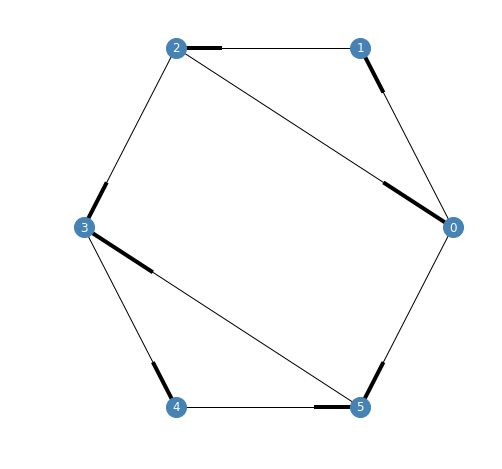

In [5]:
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx(graph, pos=nx.circular_layout(graph), node_size=400, node_color='steelblue', font_color='white')

In [6]:
strongly_connected_components(graph)

[[0, 2, 1], [5, 4, 3]]

## graph #2

In [7]:
graph = nx.DiGraph()
graph.add_nodes_from(range(7))
graph.add_edges_from([
    (0, 1), (1, 2), (2, 0), 
    (0, 3), (3, 4), (4, 0),
    (0, 5), (5, 6), (6, 0),
])

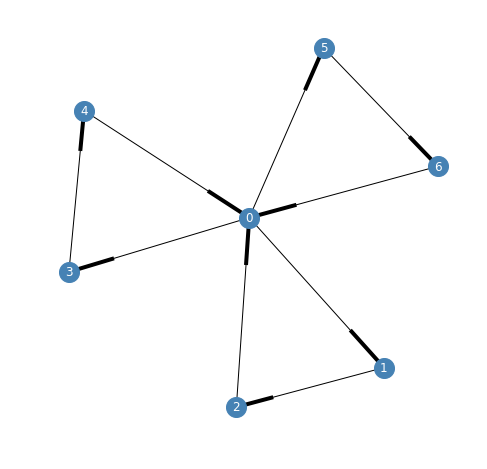

In [8]:
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx(graph, node_size=400, node_color='steelblue', font_color='white')

In [9]:
strongly_connected_components(graph)

[[0, 6, 5, 4, 3, 2, 1]]

## graph #3

In [10]:
graph = nx.DiGraph()
graph.add_nodes_from(range(7))
graph.add_edges_from([
    (0, 2), (2, 4), (4, 6), (6, 0),
    (0, 1), (2, 3), (4, 5), (6, 7),
])

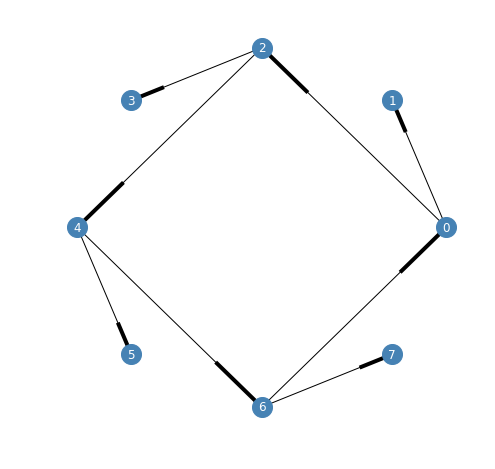

In [11]:
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx(graph, pos=nx.circular_layout(graph), node_size=400, node_color='steelblue', font_color='white')

In [12]:
strongly_connected_components(graph)

[[0, 6, 4, 2], [7], [5], [3], [1]]